# Data Cleaning, EDA & Data Visualization

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
train = pd.read_csv('../datasets/train.csv', na_values=[''], keep_default_na=False)
train.head(1)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0


In [3]:
# Rename the columns
train.columns = [column.lower().replace(' ','_') for column in train.columns]
train.head(1)

,id,open_date,city,city_group,type,p1,p2,p3,p4,p5,...,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue
0,0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0


In [4]:
# Change the index
train.set_index('id', inplace=True)
train.head(1)

,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,...,p29,p30,p31,p32,p33,p34,p35,p36,p37,revenue
id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,3.0,5,3,4,5,5,4,3,4,5653753.0


In [5]:
# Check missing values
train.isnull().sum().sum()

0

In [6]:
# Check dtypes
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137 entries, 0 to 136
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   open_date   137 non-null    object 
 1   city        137 non-null    object 
 2   city_group  137 non-null    object 
 3   type        137 non-null    object 
 4   p1          137 non-null    int64  
 5   p2          137 non-null    float64
 6   p3          137 non-null    float64
 7   p4          137 non-null    float64
 8   p5          137 non-null    int64  
 9   p6          137 non-null    int64  
 10  p7          137 non-null    int64  
 11  p8          137 non-null    int64  
 12  p9          137 non-null    int64  
 13  p10         137 non-null    int64  
 14  p11         137 non-null    int64  
 15  p12         137 non-null    int64  
 16  p13         137 non-null    float64
 17  p14         137 non-null    int64  
 18  p15         137 non-null    int64  
 19  p16         137 non-null    i

In [7]:
# Check summary statistics
train.describe().T

,count,mean,std,min,25%,50%,75%,max
p1,137.0,4.014599e+00,2.910391e+00,1.0,2.0,3.0,4.0,12.0
p2,137.0,4.408759e+00,1.514900e+00,1.0,4.0,5.0,5.0,7.5
p3,137.0,4.317518e+00,1.032337e+00,0.0,4.0,4.0,5.0,7.5
p4,137.0,4.372263e+00,1.016462e+00,3.0,4.0,4.0,5.0,7.5
p5,137.0,2.007299e+00,1.209620e+00,1.0,1.0,2.0,2.0,8.0
p6,137.0,3.357664e+00,2.134235e+00,1.0,2.0,3.0,4.0,10.0
p7,137.0,5.423358e+00,2.296809e+00,1.0,5.0,5.0,5.0,10.0
p8,137.0,5.153285e+00,1.858567e+00,1.0,4.0,5.0,5.0,10.0
p9,137.0,5.445255e+00,1.834793e+00,4.0,4.0,5.0,5.0,10.0
p10,137.0,5.489051e+00,1.847561e+00,4.0,5.0,5.0,5.0,10.0


In [8]:
# Convert open date to month, day, year
city_date = train['open_date'].str.split('/',n=2, expand=True).astype(int)
train['month'] = city_date[0]
train['day'] = city_date[1]
train['year'] = city_date[2]
train.head(1)

,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,...,p32,p33,p34,p35,p36,p37,revenue,month,day,year
id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,4,5,5,4,3,4,5653753.0,7,17,1999


In [9]:
# Define a function that returns days since opening
def calculate_date(date_opened):
    today = pd.to_datetime('2015-03-08')
    days_open = today - date_opened
    days_open = days_open.dt.days
    return days_open

# Create a column with days since opening
train['days_since_opening'] = calculate_date(pd.to_datetime(train['open_date']))
train.head(1)

,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,...,p33,p34,p35,p36,p37,revenue,month,day,year,days_since_opening
id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,2,...,5,5,4,3,4,5653753.0,7,17,1999,5713


In [10]:
# Map city group column
city_group_dict = {'Big Cities': 1, 'Other': 0}
train['city_group'] = train['city_group'].map(city_group_dict)
train.head(1)

,open_date,city,city_group,type,p1,p2,p3,p4,p5,p6,...,p33,p34,p35,p36,p37,revenue,month,day,year,days_since_opening
id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,İstanbul,1,IL,4,5.0,4.0,4.0,2,2,...,5,5,4,3,4,5653753.0,7,17,1999,5713


In [11]:
# Dummy variables
train = pd.get_dummies(data=train, columns=['city', 'type'], drop_first=True)
train.head(1)

,open_date,city_group,p1,p2,p3,p4,p5,p6,p7,p8,...,city_Samsun,city_Tekirdağ,city_Tokat,city_Trabzon,city_Uşak,city_İstanbul,city_İzmir,city_Şanlıurfa,type_FC,type_IL
id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,1,4,5.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,1,0,0,0,1


#### Outliers

In [12]:
# Detecting outliers
train[train['revenue']>10000000]

# Code that would drop outliers (not dropped to build a conservative model)
train = train[train['revenue'] < 10000000 ]
train.reset_index(drop=False)
train.head(1)

,open_date,city_group,p1,p2,p3,p4,p5,p6,p7,p8,...,city_Samsun,city_Tekirdağ,city_Tokat,city_Trabzon,city_Uşak,city_İstanbul,city_İzmir,city_Şanlıurfa,type_FC,type_IL
id,,,,,,,,,,,,,,,,,,,,,
0,07/17/1999,1,4,5.0,4.0,4.0,2,2,5,4,...,0,0,0,0,0,1,0,0,0,1


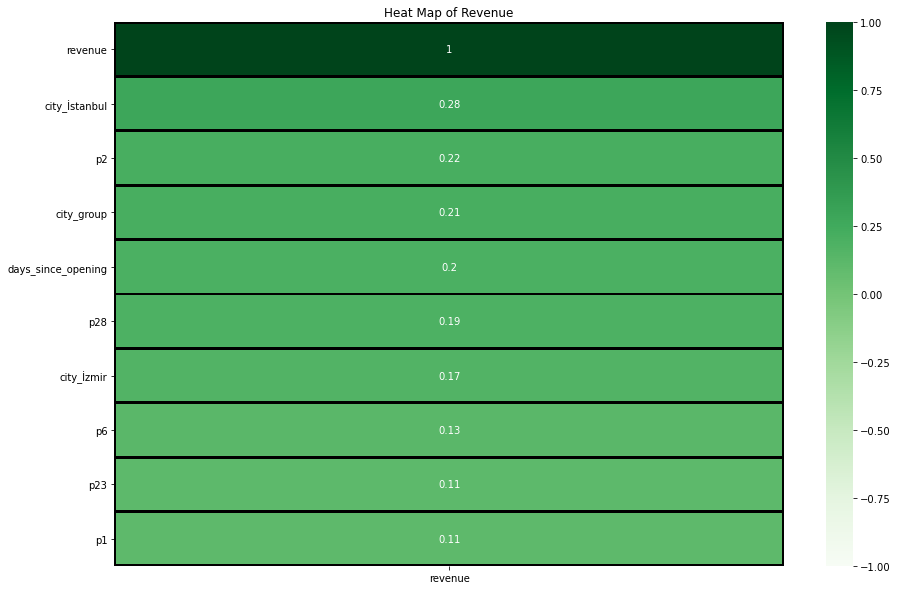

In [13]:
# Heat map of revenue with 10 most highly correlated X variables
plt.figure(figsize=(15,10))
plt.title('Heat Map of Revenue')
sns.heatmap(train.corr()[['revenue']].sort_values(by='revenue',ascending=False).head(10),cmap='Greens',vmin=-1,vmax=1,annot=True,linecolor='black',linewidths=2);

**Interpretation:** The heatmap above displays the 10 features with the highest correlation to revenue. Note that even the feature with the highest correlation (i.e. city_istanbul) only has a Pearson correlation coefficient of 0.28.

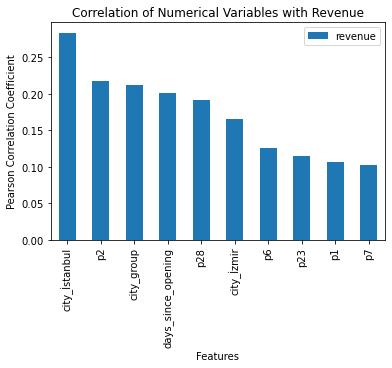

In [14]:
# Correlation of numerical variables with revenue
train.corr()[['revenue']].sort_values(by='revenue',ascending=False)[1:11].plot(kind='bar')
plt.title('Correlation of Numerical Variables with Revenue')
plt.xlabel('Features')
plt.ylabel('Pearson Correlation Coefficient');

**Interpretation:** The bar graph above shows the 10 numerical variables with the highest correlation to revenue.

/Users/ericrodriguez/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


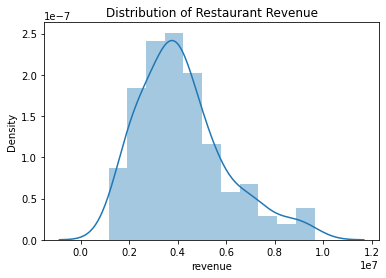

In [15]:
# Plot of distribution
plt.title('Distribution of Restaurant Revenue')
sns.distplot(train['revenue']);

**Interpretation:** The graph above shows the distribution of revenues. The distribution appears to be slightly skewed to the right.

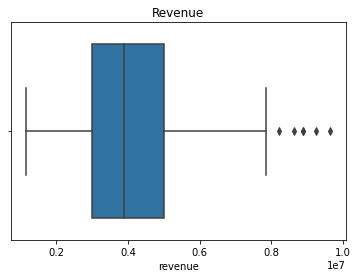

In [16]:
# Boxplot of revenue
plt.title('Revenue')
sns.boxplot(x=train['revenue']);

**Interpretation:** The presence of outliers will indubitably affect the performance of our production model since the RMSE is heavily affected by outliers.

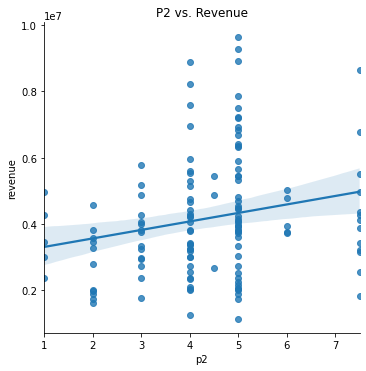

In [17]:
# Linear plot of p2 against revenue
sns.lmplot(x='p2',y='revenue',data=train)
plt.title('P2 vs. Revenue');

**Interpretation:** P2 has a somewhat linear relationship with revenue.

In [18]:
# Save to csv file
train.to_csv('../datasets/cleaned_training_data.csv', index=False)